<a href="https://colab.research.google.com/github/Mulababs/3mtt-Deeptech/blob/main/TechForAll_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install and Import Libraries
!pip install pandas matplotlib seaborn -q

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Set style for better visuals
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Upload Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('sales_and_customer_insights.csv')

Saving sales_and_customer_insights.csv to sales_and_customer_insights.csv


In [4]:
# Basic Info
print(df.head())
print(df.info())
print(df.describe())

   Customer_ID   Product_ID Transaction_ID  Purchase_Frequency  \
0  CUST_9HOS83  PROD_IK97D1   TRANS_II1DZG                  17   
1  CUST_AJU17N  PROD_UNN7KP   TRANS_9HJF7I                  10   
2  CUST_11XNYF  PROD_0XEW2W   TRANS_OT96OM                   3   
3  CUST_IGH8G3  PROD_3IIAJN   TRANS_45V00G                  12   
4  CUST_OK6PUM  PROD_VMIWD2   TRANS_ZAK760                  18   

   Average_Order_Value Most_Frequent_Category  Time_Between_Purchases  \
0               172.57            Electronics                      45   
1                64.89               Clothing                       6   
2               120.38                 Sports                      23   
3                70.34               Clothing                       5   
4                42.39            Electronics                      10   

          Region  Churn_Probability  Lifetime_Value Launch_Date  \
0  South America               0.98          952.81   3/14/2020   
1  South America              

In [5]:
# Data Cleaning & Preparation
# Handle missing values
df.fillna({
    'Churn_Probability': df['Churn_Probability'].median(),
    'Lifetime_Value': df['Lifetime_Value'].median(),
    'Average_Order_Value': df['Average_Order_Value'].median()
}, inplace=True)

In [6]:
# Standardize dates
df['Launch_Date'] = pd.to_datetime(df['Launch_Date'], errors='coerce')
df['Peak_Sales_Date'] = pd.to_datetime(df['Peak_Sales_Date'], errors='coerce')

In [7]:
# Ensure numeric columns
numeric_cols = ['Purchase_Frequency', 'Average_Order_Value', 'Lifetime_Value']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [16]:
# Create Time-Based Features
df['Year'] = df['Launch_Date'].dt.year
df['Month'] = df['Launch_Date'].dt.month
df['Month Name'] = df['Launch_Date'].dt.month_name()
df['Quarter'] = df['Launch_Date'].dt.to_period('Q')

In [27]:
df[['Year','Month','Month Name','Quarter']].drop_duplicates().head(5)

,Year,Month,Month Name,Quarter
0,2020,3,March,2020Q1
1,2022,10,October,2022Q4
2,2021,11,November,2021Q4
3,2022,3,March,2022Q1
4,2022,11,November,2022Q4


In [17]:
# Creating computed field (Metrics)
df['Total_Revenue'] = df['Average_Order_Value'] * df['Purchase_Frequency']
df['Estimated Profit'] = df['Total_Revenue'] * 0.25
df['Profit_Margin'] = df['Estimated Profit'] / df['Total_Revenue']

Exploratory Data Analysis (EDA)

# **Sales Performance**

- What is the total yearly and monthly revenue?


- Identify sales peaks and dips.


- Which months contribute the highest revenue?


In [8]:
# A. Sales Performance
df['Total Revenue'] = df['Purchase_Frequency'] * df['Average_Order_Value']
total_revenue = df['Total Revenue'].sum()
avg_order_value = df['Average_Order_Value'].mean()
# total_profit = df['Estimated Profit'].sum() # 'Estimated Profit' column not found

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value: ${avg_order_value:,.2f}")
# print(f"Estimated Profit: ${total_profit:,.2f}") # 'Estimated Profit' column not found

Total Revenue: $10,951,661.22
Average Order Value: $110.01


In [29]:
yearly_summary = df.groupby('Year')[['Total_Revenue', 'Estimated Profit', 'Profit_Margin']].sum().reset_index()
print("Yearly Summary of Revenue, Profit, and Profit Margin:")
print(yearly_summary)

Yearly Summary of Revenue, Profit, and Profit Margin:
   Year  Total_Revenue  Estimated Profit  Profit_Margin
0  2020     3571733.79       892933.4475         821.00
1  2021     3759093.25       939773.3125         848.75
2  2022     3614722.46       903680.6150         828.50
3  2023        6111.72         1527.9300           1.75


In [38]:
# Monthly Revenue Trend
# Ensure 'Month Name' is abbreviated and then calculate total revenue by year and calendar month
df['Month Name'] = df['Launch_Date'].dt.strftime('%b')
monthly_revenue_yearly = df.groupby(['Year', 'Month Name'])['Total Revenue'].sum().reset_index()

# Define the order of months for proper sorting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_revenue_yearly['Month Name'] = pd.Categorical(monthly_revenue_yearly['Month Name'], categories=month_order, ordered=True)
monthly_revenue_yearly = monthly_revenue_yearly.sort_values(['Year', 'Month Name'])

print("=== TOTAL REVENUE BY YEAR AND CALENDAR MONTH ===")
print(monthly_revenue_yearly)

=== TOTAL REVENUE BY YEAR AND CALENDAR MONTH ===
    Year Month Name  Total Revenue
4   2020        Jan      282485.48
3   2020        Feb      255947.92
7   2020        Mar      331097.76
0   2020        Apr      338468.29
8   2020        May      283960.46
6   2020        Jun      290191.16
5   2020        Jul      335391.72
1   2020        Aug      281397.50
11  2020        Sep      313165.36
10  2020        Oct      303300.28
9   2020        Nov      285944.18
2   2020        Dec      270383.68
16  2021        Jan      327468.49
15  2021        Feb      320658.53
19  2021        Mar      375801.79
12  2021        Apr      258268.14
20  2021        May      334069.79
18  2021        Jun      276660.88
17  2021        Jul      317175.83
13  2021        Aug      338476.29
23  2021        Sep      296682.88
22  2021        Oct      279781.62
21  2021        Nov      324748.57
14  2021        Dec      309300.44
28  2022        Jan      312957.72
27  2022        Feb      295199.94
31  20

In [41]:
import plotly.express as px

# Monthly Bar Chart, now indicating the year
fig_m = px.bar(monthly_revenue_yearly, x='Month Name', y='Total Revenue',
               color='Year', # Indicate the year by color
               text_auto='.3s',
               title='Total Revenue by Month and Year',
               labels={'x': 'Month', 'y': 'Revenue ($)'},
               barmode='group') # Display bars side-by-side for each month/year

fig_m.update_xaxes(categoryorder='array', categoryarray=month_order)
fig_m.update_traces(textposition='outside')
fig_m.show()

=== Sales Peaks ===
Highest Revenue: $375,801.79 in Mar 2021

=== Sales Dips ===
Lowest Revenue: $6,111.72 in Jan 2023


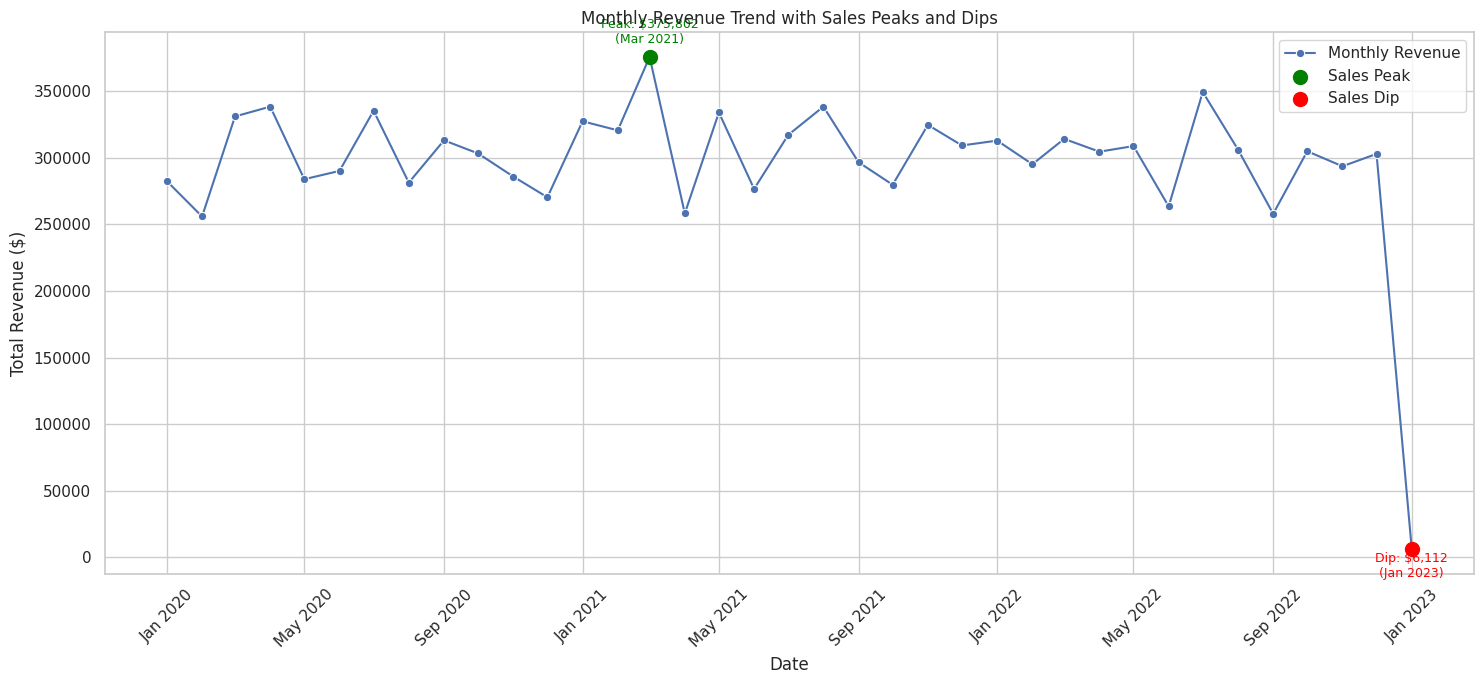

In [48]:
# Identify sales peaks and dips
peak_sales = monthly_revenue_yearly.loc[monthly_revenue_yearly['Total Revenue'].idxmax()]
dip_sales = monthly_revenue_yearly.loc[monthly_revenue_yearly['Total Revenue'].idxmin()]

print("=== Sales Peaks ===")
print(f"Highest Revenue: ${peak_sales['Total Revenue']:,.2f} in {peak_sales['Month Name']} {peak_sales['Year']}")

print("\n=== Sales Dips ===")
print(f"Lowest Revenue: ${dip_sales['Total Revenue']:,.2f} in {dip_sales['Month Name']} {dip_sales['Year']}")

# Prepare data for line graph across all months and years
# Create a 'Date' column for continuous plotting (monthly_revenue_yearly already has 'Year' and 'Month Name')
monthly_revenue_yearly['Date'] = pd.to_datetime(
    monthly_revenue_yearly['Year'].astype(str) + '-' + monthly_revenue_yearly['Month Name'].astype(str),
    format='%Y-%b' # Use %b for abbreviated month names
)
monthly_revenue_yearly = monthly_revenue_yearly.sort_values('Date')

plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_revenue_yearly, x='Date', y='Total Revenue', marker='o', label='Monthly Revenue')

# Mark peak and dip sales on the line graph
peak_date = pd.to_datetime(f"{peak_sales['Year']}-{peak_sales['Month Name']}", format='%Y-%b')
dip_date = pd.to_datetime(f"{dip_sales['Year']}-{dip_sales['Month Name']}", format='%Y-%b')

plt.scatter(peak_date, peak_sales['Total Revenue'], color='green', s=100, zorder=5, label='Sales Peak')
plt.annotate(f"Peak: ${peak_sales['Total Revenue']:,.0f}\n({peak_sales['Month Name']} {peak_sales['Year']})",
             (peak_date, peak_sales['Total Revenue']),
             textcoords="offset points", xytext=(0,10), ha='center', color='green', fontsize=9)

plt.scatter(dip_date, dip_sales['Total Revenue'], color='red', s=100, zorder=5, label='Sales Dip')
plt.annotate(f"Dip: ${dip_sales['Total Revenue']:,.0f}\n({dip_sales['Month Name']} {dip_sales['Year']})",
             (dip_date, dip_sales['Total Revenue']),
             textcoords="offset points", xytext=(0,-20), ha='center', color='red', fontsize=9)

plt.title('Monthly Revenue Trend with Sales Peaks and Dips')
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')

import matplotlib.dates as mdates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Format as 'Jan 2020'
plt.xticks(rotation=45)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Sales peak is March, 2021
# Sales dip is January, 2023

March 2021 - Highest Revenue
January 2023 - Lowest Revenue

# B. Product & Category **Analysis**

- Which categories sell the most?


- Which products generate the highest revenue?


- What are the high-frequency but low-value items?

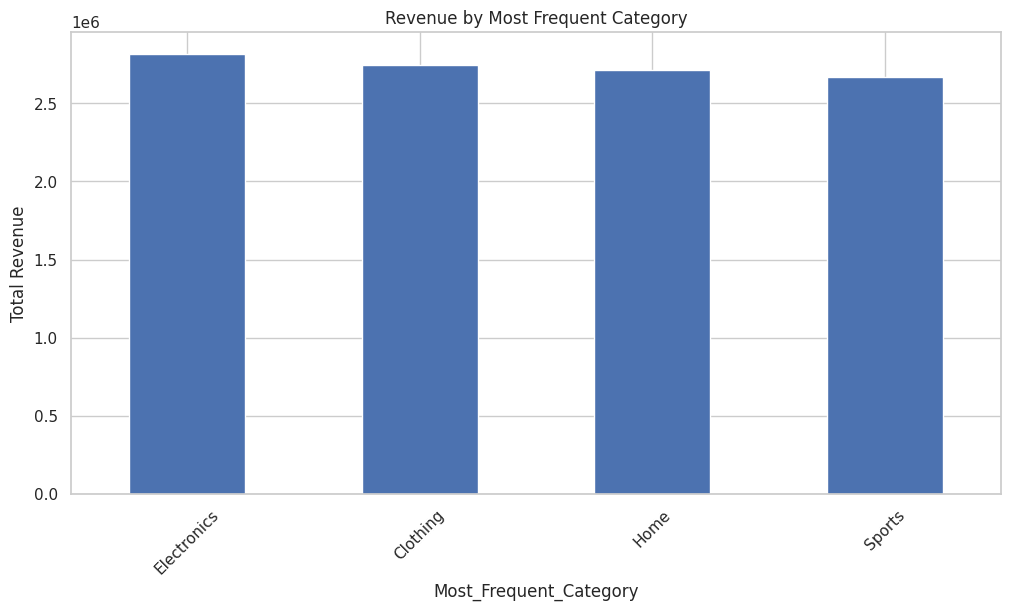

In [49]:
# Product & Category Analysis
category_revenue = df.groupby('Most_Frequent_Category')['Total Revenue'].sum().sort_values(ascending=False)

plt.figure()
category_revenue.plot(kind='bar')
plt.title('Revenue by Most Frequent Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Electronic Accessories - Highest Revenue therefore it sells the most

=== Top 10 Products by Revenue ===
Product_ID
PROD_AWKYQU    3782.14
PROD_RRXW8G    3773.97
PROD_5TFUE2    3773.97
PROD_B43EDP    3771.50
PROD_6KX9JT    3761.43
Name: Total Revenue, dtype: float64


/tmp/ipython-input-2222301652.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




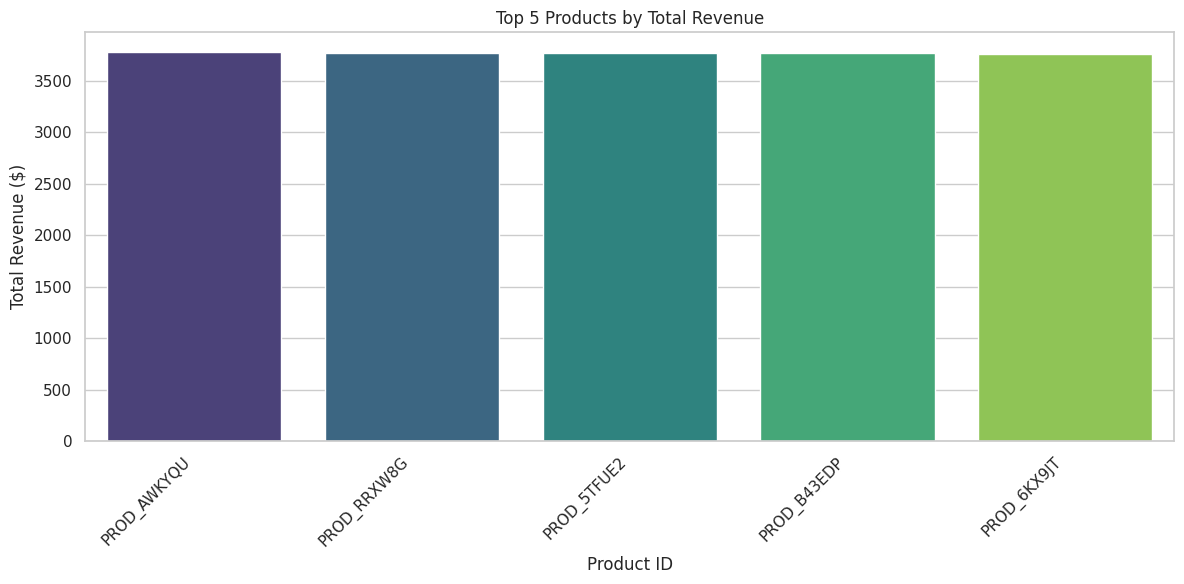

In [54]:
# Identify products with the highest revenue
product_revenue = df.groupby('Product_ID')['Total Revenue'].sum().sort_values(ascending=False)

print("=== Top 10 Products by Revenue ===")
print(product_revenue.head(5))

plt.figure(figsize=(12, 6))
sns.barplot(x=product_revenue.head(5).index, y=product_revenue.head(5).values, palette='viridis')
plt.title('Top 5 Products by Total Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
PROD_AWKYQU generates the highest revenue among all products analyzed

In [59]:
high_frequency_threshold = product_metrics['Purchase_Frequency'].quantile(0.75)
low_revenue_threshold = product_metrics['Total_Revenue'].quantile(0.25)

print(f"High Purchase Frequency Threshold (75th percentile): {high_frequency_threshold:.2f}")
print(f"Low Total Revenue Threshold (25th percentile): {low_revenue_threshold:.2f}")

High Purchase Frequency Threshold (75th percentile): 15.00
Low Total Revenue Threshold (25th percentile): 397.86


**# C. Customer Behavior**

- Which segment purchases the most?

- Spend per customer segment

- Repeat purchase trends


In [63]:
# Note: In this dataset, "Most_Frequent_Category" acts as the customer segment
# (e.g., customers who mostly buy Electronics, Clothing, etc.)

segment_counts = df['Most_Frequent_Category'].value_counts().reset_index()
segment_counts.columns = ['Customer_Segment', 'Number_of_Customers']

# Total purchases (frequency) per segment
segment_purchases = df.groupby('Most_Frequent_Category')['Purchase_Frequency'].sum().reset_index()
segment_purchases.columns = ['Customer_Segment', 'Total_Purchases']

q1 = segment_counts.merge(segment_purchases, on='Customer_Segment').sort_values('Total_Purchases', ascending=False)

print("Q1: Which segment purchases the most?\n")
print(q1.to_string(index=False))

# Visualization
import plotly.express as px

fig_q1a = px.bar(q1, x='Customer_Segment', y='Total_Purchases',
                 title='Q1: Total Purchases by Customer Segment',
                 text='Total_Purchases', color='Customer_Segment')
fig_q1a.update_traces(texttemplate='%{text:,.0f}')
fig_q1a.show()

fig_q1b = px.bar(q1.sort_values('Number_of_Customers', ascending=False),
                 x='Customer_Segment', y='Number_of_Customers',
                 title='Number of Customers per Segment',
                 color='Customer_Segment')
fig_q1b.show()

Q1: Which segment purchases the most?

Customer_Segment  Number_of_Customers  Total_Purchases
     Electronics                 2567            25740
        Clothing                 2510            24858
            Home                 2476            24520
          Sports                 2447            24439


In [ ]:
The Electronic Accessories segment demonstrates the highest purchase volume among all customer categories analyzed.lectronic accessories segment purchases the most

In [64]:
# Calculate total revenue per customer segment
segment_revenue = df.groupby('Most_Frequent_Category')['Total Revenue'].sum().sort_values(ascending=False).reset_index()
segment_revenue.columns = ['Customer_Segment', 'Total_Revenue_Spent']

print("=== Total Revenue Spent per Customer Segment ===")
print(segment_revenue.to_string(index=False))

# Visualize spend per customer segment
fig_spend = px.bar(segment_revenue, x='Customer_Segment', y='Total_Revenue_Spent',
                   title='Total Revenue Spent by Customer Segment',
                   text_auto='.2s', color='Customer_Segment')
fig_spend.update_traces(textposition='outside')
fig_spend.show()

=== Total Revenue Spent per Customer Segment ===
Customer_Segment  Total_Revenue_Spent
     Electronics           2820376.42
        Clothing           2747636.65
            Home           2715868.56
          Sports           2667779.59


=== Distribution of Purchase Frequency ===
Purchase_Frequency
1     594
2     521
3     527
4     498
5     553
6     503
7     505
8     544
9     532
10    550
11    494
12    500
13    535
14    521
15    497
16    524
17    519
18    532
19    551


/tmp/ipython-input-2856423013.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




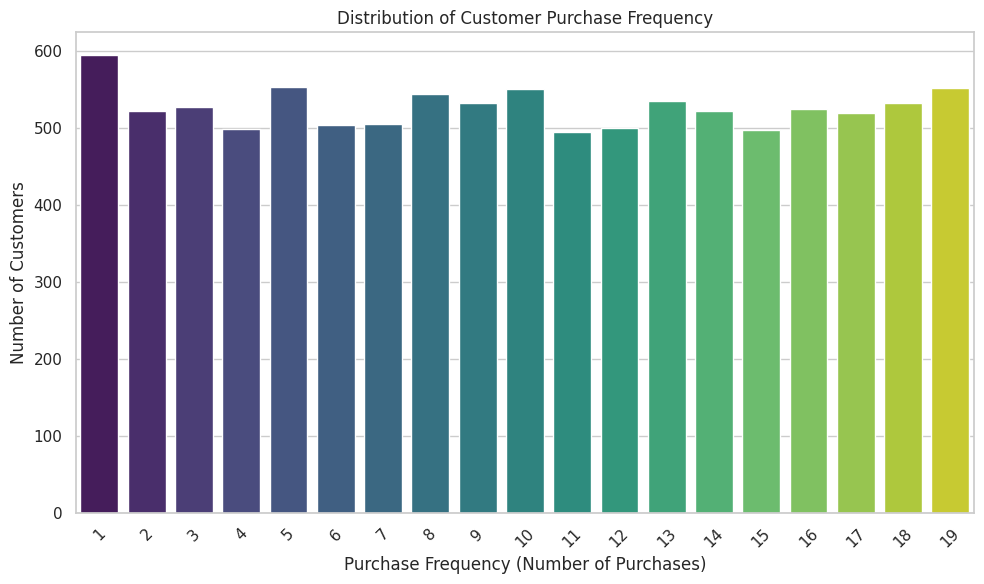

In [66]:
# Repeat purchase trends
# Analyzing the distribution of Purchase_Frequency
purchase_frequency_counts = df['Purchase_Frequency'].value_counts().sort_index()

print("=== Distribution of Purchase Frequency ===")
print(purchase_frequency_counts.to_string())

plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_frequency_counts.index, y=purchase_frequency_counts.values, palette='viridis')
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Purchase Frequency (Number of Purchases)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== Total Revenue by Region ===
Region
South America    2807009.45
Asia             2748520.39
Europe           2731706.83
North America    2664424.55
Name: Total Revenue, dtype: float64


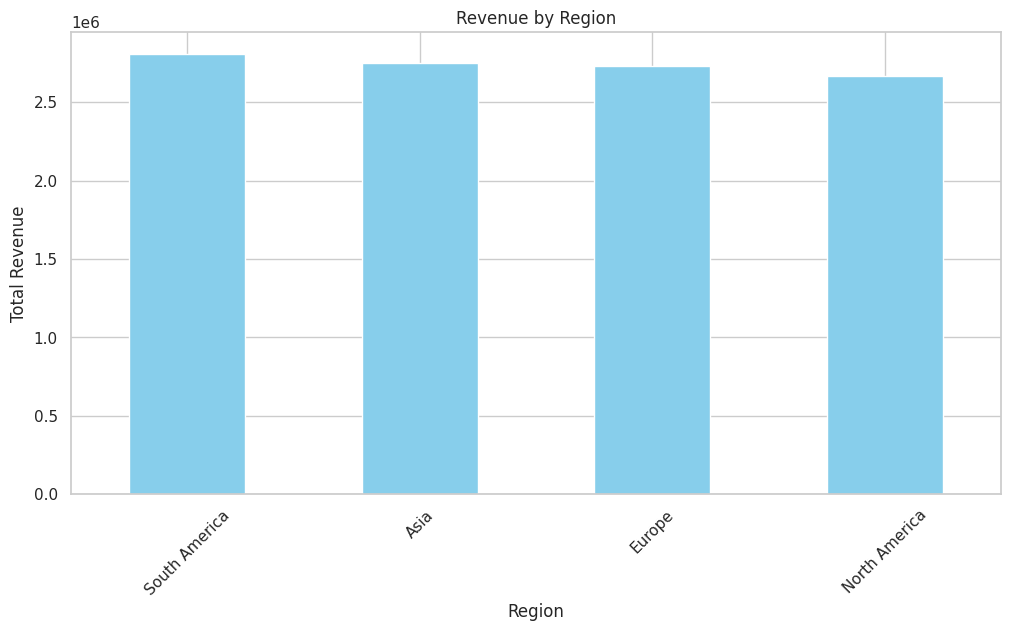

In [75]:
# D. Regional Performance
region_revenue = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)

print("=== Total Revenue by Region ===")
print(region_revenue)

plt.figure()
region_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
south America - Highest Revenue

Compare regions by customer count, product type, and sales

=== Number of Unique Customers by Region ===
       Region  Unique_Customer_Count
         Asia                   2472
       Europe                   2547
North America                   2454
South America                   2527


/tmp/ipython-input-2441277932.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




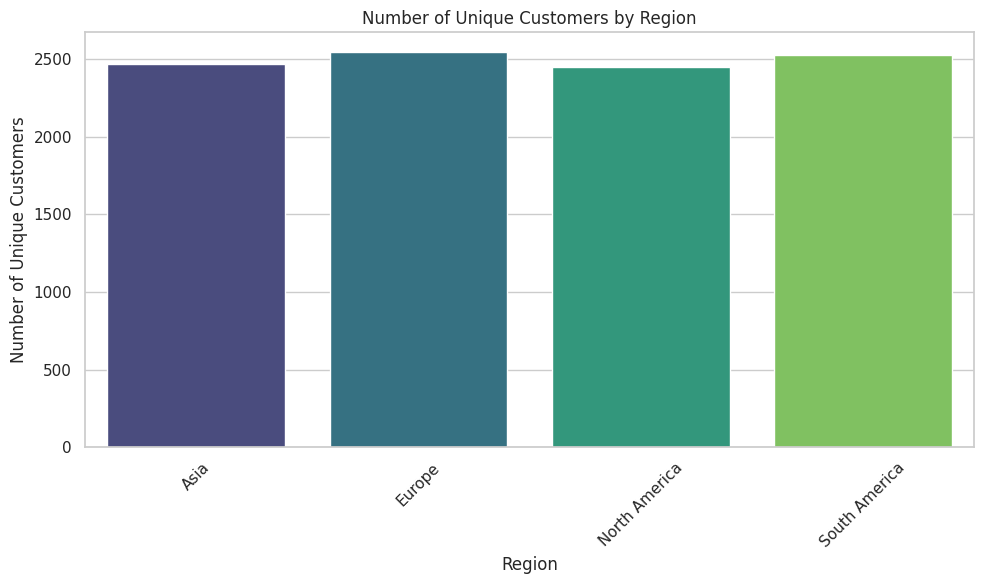

In [74]:
# Compare regions by customer count

customer_count_by_region = df.groupby('Region')['Customer_ID'].nunique().reset_index()
customer_count_by_region.columns = ['Region', 'Unique_Customer_Count']

print("=== Number of Unique Customers by Region ===")
print(customer_count_by_region.to_string(index=False))

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Unique_Customer_Count', data=customer_count_by_region, palette='viridis')
plt.title('Number of Unique Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
# Compare regions by  product

regional_category_distribution = df.groupby(['Region', 'Most_Frequent_Category']).size().reset_index(name='Count')

print("=== Distribution of Most Frequent Product Categories by Region ===")
print(regional_category_distribution.to_string(index=False))

import plotly.express as px

fig_category_region = px.bar(regional_category_distribution,
                             x='Region',
                             y='Count',
                             color='Most_Frequent_Category',
                             title='Distribution of Most Frequent Product Categories by Region',
                             labels={'Region': 'Region', 'Count': 'Count of Categories'},
                             barmode='group') # Use 'group' for side-by-side bars

fig_category_region.show()

=== Distribution of Most Frequent Product Categories by Region ===
       Region Most_Frequent_Category  Count
         Asia               Clothing    635
         Asia            Electronics    639
         Asia                   Home    599
         Asia                 Sports    599
       Europe               Clothing    633
       Europe            Electronics    644
       Europe                   Home    622
       Europe                 Sports    648
North America               Clothing    601
North America            Electronics    643
North America                   Home    633
North America                 Sports    577
South America               Clothing    641
South America            Electronics    641
South America                   Home    622
South America                 Sports    623


=== Total Revenue by Region ===
Region
South America    2807009.45
Asia             2748520.39
Europe           2731706.83
North America    2664424.55
Name: Total Revenue, dtype: float64


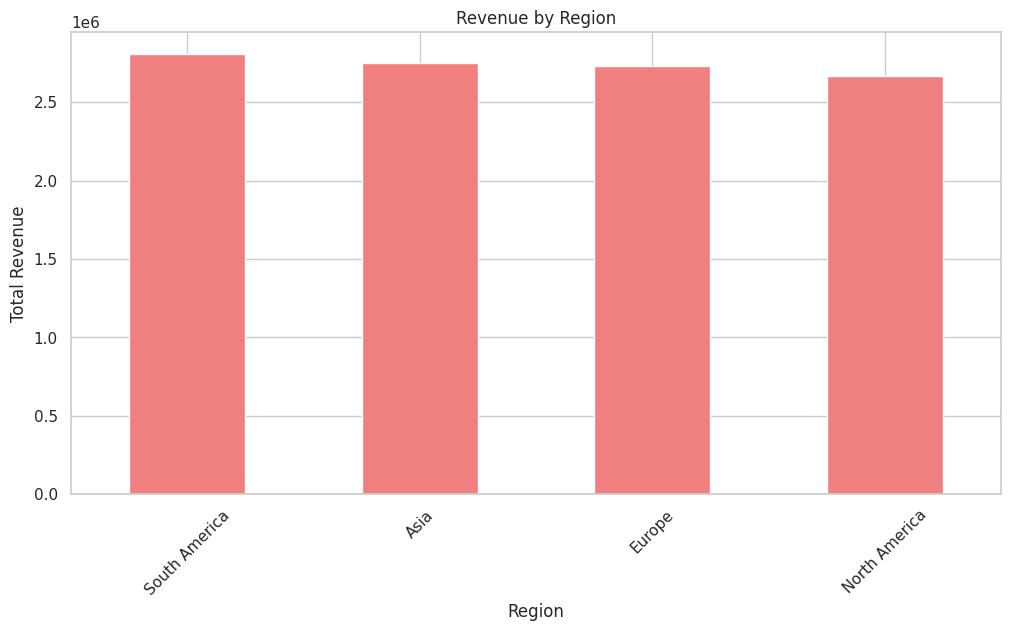

In [77]:
# Compare regions by sales
region_revenue = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)

print("=== Total Revenue by Region ===")
print(region_revenue)

plt.figure()
region_revenue.plot(kind='bar', color='lightcoral')
plt.title('Revenue by Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

## Business Insights

## Comprehensive Summary of Analysis and Insights



## Summary:

### Data Analysis Key Findings

*   **Overall Sales Performance**: The total revenue across all years was \$10,951,661.22. 2021 recorded the highest annual revenue at \$3,759,093.25, while 2023 showed a significant drop to \$6,111.72, likely due to incomplete data. The highest monthly revenue peak was \$375,801.79 in March 2021.
*   **Product & Category Performance**: "Electronics" was the top-selling product category, generating the highest revenue at \$2,820,376.42, followed by Clothing, Home, and Sports. The product `PROD_AWKYQU` was the top individual revenue generator at \$3,782.14. Products like `PROD_0V6QQR` were identified as high-frequency, low-value items (e.g., 16 purchases, \$332.96 revenue).
*   **Customer Behavior**: The "Electronics" customer segment displayed the highest total purchases (25,740) and generated the most revenue (approximately \$2.82 million). Customer purchase frequencies were relatively uniformly distributed across 1 to 19 purchases, indicating a diverse customer base.
*   **Regional Performance**: South America emerged as the top-performing region by revenue, generating \$2,807,009.45. Europe had the highest number of unique customers (2,547), while North America had the lowest revenue (\$2,664,424.55) and fewest customers (2,454). "Electronics" and "Clothing" were consistently popular categories across all regions.

### Recommendation

*   **Optimize Product and Customer Strategies**: Given that "Electronics" is the leading category in both revenue and customer engagement, prioritize product development and marketing efforts in this segment. Develop tailored loyalty programs for Electronics customers to enhance retention and lifetime value.
*   **Address Regional Disparities**: Investigating the success factors in South America and exploring scaling these strategies to other regions, especially North America, which is identified as an underperforming region in terms of revenue and customer count.
